In [ ]:
%pip install scikit-learn matplotlib numpy

# 1. REDUCCIÓN DE LA DIMENSIONALIDAD

## Paso 1 

Cargamos la data del archivo ipynb para utilizarlo en la lista data, de la extraction de los features vectors.

In [1]:
import os
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import random

In [2]:
# Especifica la ruta a tu carpeta
# folder_path = '/Users/pierre/Documents/6_ciclo/machineLearning/project3/features/r21d/r2plus1d_18_16_kinetics/'
# folder_path = '/home/andrewkc/Projects/ml-project-3/features_10/r21d/r2plus1d_18_16_kinetics'
folder_path = '/home/andrewkc/Projects/ml-p3/features/r21d/r2plus1d_18_16_kinetics'

# Lista para almacenar los datos cargados
data_list = []

for filename in os.listdir(folder_path):
    if filename.endswith('.npy'):
        file_path = os.path.join(folder_path, filename)
        data = np.load(file_path)
        data_list.append(data)

## Paso 2

Calculamos la varianza explicada para saber cuantos datos usamos, para obtener el mejor n_components.

In [3]:
# Tamaño promedio obtenido de los tamaños
scaler = StandardScaler()
total_elements = sum(data.size for data in data_list)
average_size = total_elements // len(data_list)

resized_data_list = []
for data in data_list:
    flat_data = data.flatten()
    if flat_data.size < average_size:
        padded_data = np.pad(flat_data, (0, average_size - flat_data.size), mode='constant')
    else:
        padded_data = flat_data[:average_size]
    resized_data_list.append(padded_data)

scaled_data = scaler.fit_transform(resized_data_list)
cov_matrix = np.cov(scaled_data.T)


singular_values = np.linalg.svd(scaled_data, full_matrices=False, compute_uv=False)
explained_variance_ratio = (singular_values ** 2) / np.sum(singular_values ** 2)
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
optimal_n_components = np.argmax(cumulative_variance_ratio >= 0.98) + 1
print(optimal_n_components)

1563


## Paso 3
Usamos los siguientes métodos de reducción de la dimensionalidad.

**SVD Principal Components**

In [4]:
svd = TruncatedSVD(n_components=optimal_n_components)
svd_principal_components = svd.fit_transform(scaled_data)
svd_reconstructed_data = np.dot(svd_principal_components, svd.components_)
svd_reconstruction_error = np.linalg.norm(scaled_data - svd_reconstructed_data, 'fro')
print(svd_reconstruction_error)
print("Componentes principales obtenidos:")
print(svd_principal_components)

661.2274510775145
Componentes principales obtenidos:
[[ 1.61891729e+01 -2.16441392e+01 -1.00539960e+00 ...  3.80831286e-01
  -3.97500670e-01 -3.25724855e-01]
 [-5.09357679e+00 -5.42217060e+00  3.91220042e+01 ... -8.27610391e-01
   1.57289857e-01 -1.84517266e+00]
 [-2.02201343e+00  5.24635083e-01  2.94314489e+01 ...  2.27644595e-01
   1.60512604e-02 -1.32471537e+00]
 ...
 [ 1.47149471e+01  1.01708911e+01 -5.46617463e+00 ...  6.69154184e-01
   4.23067255e-01 -2.47575078e-01]
 [ 1.18900287e+01  7.50824995e+00 -9.33208943e+00 ... -3.47481710e-01
  -2.08714673e-01  5.13494934e-01]
 [ 1.32297639e+01  1.77455967e+01 -5.78888733e+00 ... -1.30888879e-01
  -1.94260214e-01  5.30569078e-01]]


**PCA Principal Components**

In [5]:
pca = PCA(n_components=optimal_n_components)
pca_principal_components = pca.fit_transform(scaled_data)
pca_reconstructed_data = np.dot(pca_principal_components, pca.components_)
pca_reconstruction_error = np.linalg.norm(scaled_data - pca_reconstructed_data, 'fro')
print(pca_reconstruction_error)
print("Componentes principales obtenidos:")
print(pca_principal_components)

663.910546055071
Componentes principales obtenidos:
[[ 1.61891729e+01 -2.16441392e+01 -1.00539960e+00 ... -1.08421140e-01
   1.03451078e+00  6.05234320e-01]
 [-5.09357679e+00 -5.42217060e+00  3.91220042e+01 ... -1.22568934e+00
  -3.71510419e-01  1.90357878e-01]
 [-2.02201343e+00  5.24635083e-01  2.94314489e+01 ... -3.57119661e-01
   1.02188973e+00 -2.04810891e-02]
 ...
 [ 1.47149471e+01  1.01708911e+01 -5.46617463e+00 ... -4.44523393e-01
  -5.98175782e-02 -8.03957043e-01]
 [ 1.18900287e+01  7.50824995e+00 -9.33208943e+00 ... -6.35894071e-01
  -1.08451605e+00 -1.88230891e-01]
 [ 1.32297639e+01  1.77455967e+01 -5.78888733e+00 ... -3.60225923e-01
   3.41350222e-01 -3.69345879e-02]]


**FA Principal Components**

In [6]:
fa = FactorAnalysis(n_components=optimal_n_components)
fa_principal_components = fa.fit_transform(scaled_data)
fa_reconstructed_data = np.dot(fa_principal_components, fa.components_)
fa_reconstruction_error = np.linalg.norm(scaled_data - fa_reconstructed_data, 'fro')
print(fa_reconstruction_error)
print("Componentes principales obtenidos:")
print(fa_principal_components)

679.8077399839103
Componentes principales obtenidos:
[[-0.49329527 -1.14925164  0.34099456 ...  0.71633862 -0.02993891
  -0.44196278]
 [ 0.10951434 -0.27567442 -1.27044777 ...  0.81259206  0.33529843
  -0.09944125]
 [ 0.10662937  0.04796327 -0.74339571 ... -0.68501088  0.59782158
   1.30629281]
 ...
 [-0.46990279  0.42237385 -0.59396178 ... -0.65140078  0.31745989
  -0.10792897]
 [-0.54377269  0.38074589 -0.35943778 ... -0.51317081 -1.81018224
  -0.11177308]
 [-0.62947056  1.14957653  1.50609083 ...  0.17207869 -0.90861311
   1.10626327]]


Graficas

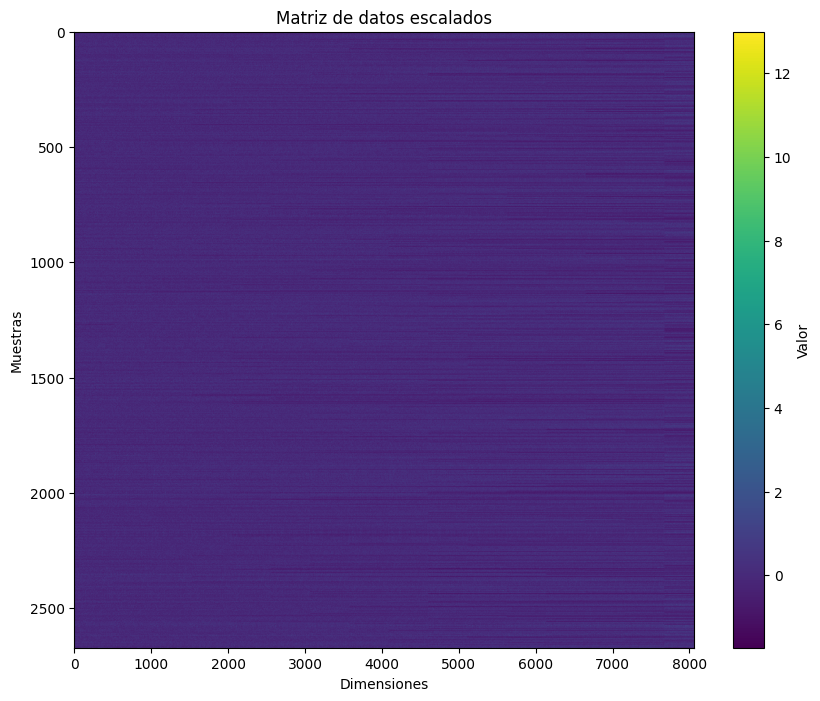

In [7]:
plt.figure(figsize=(10, 8))
plt.imshow(scaled_data, cmap='viridis', aspect='auto')
plt.colorbar(label='Valor')
plt.title('Matriz de datos escalados')
plt.xlabel('Dimensiones')
plt.ylabel('Muestras')
plt.show()

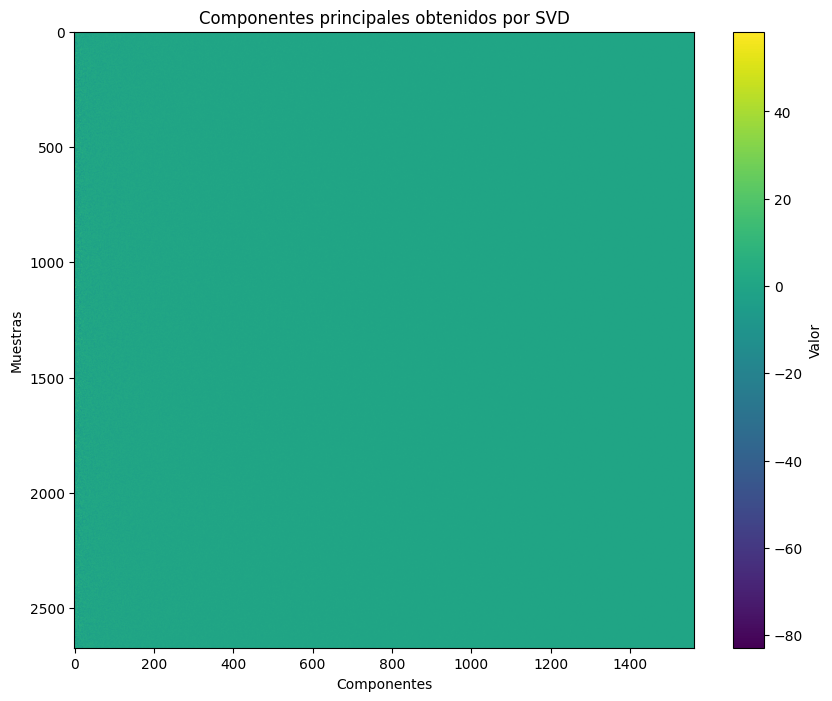

In [8]:

plt.figure(figsize=(10, 8))
plt.imshow(svd_principal_components, cmap='viridis', aspect='auto')
plt.colorbar(label='Valor')
plt.title('Componentes principales obtenidos por SVD')
plt.xlabel('Componentes')
plt.ylabel('Muestras')
plt.show()

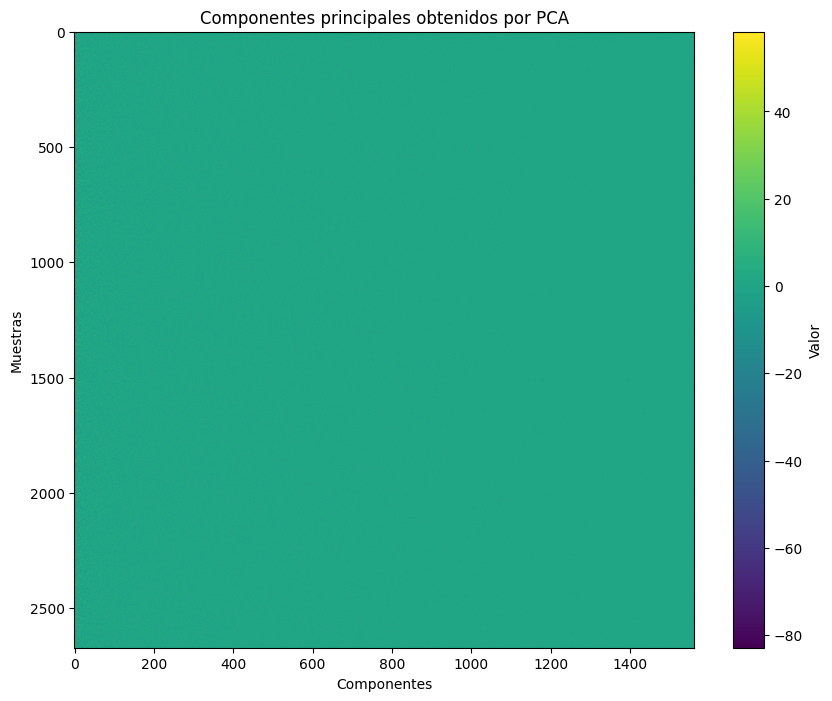

In [9]:

plt.figure(figsize=(10, 8))
plt.imshow(pca_principal_components, cmap='viridis', aspect='auto')
plt.colorbar(label='Valor')
plt.title('Componentes principales obtenidos por PCA')
plt.xlabel('Componentes')
plt.ylabel('Muestras')
plt.show()

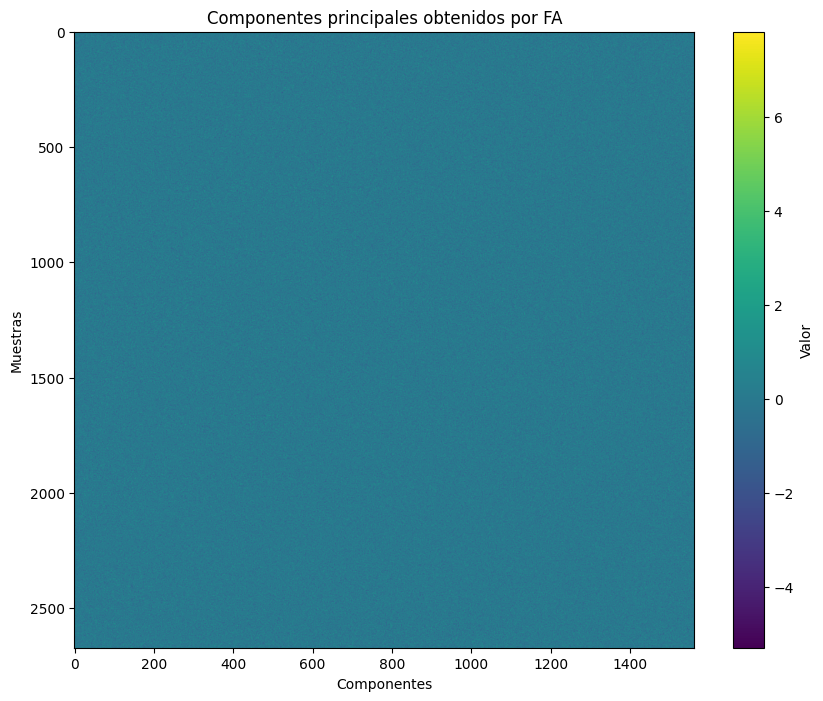

In [10]:

plt.figure(figsize=(10, 8))
plt.imshow(fa_principal_components, cmap='viridis', aspect='auto')
plt.colorbar(label='Valor')
plt.title('Componentes principales obtenidos por FA')
plt.xlabel('Componentes')
plt.ylabel('Muestras')
plt.show()

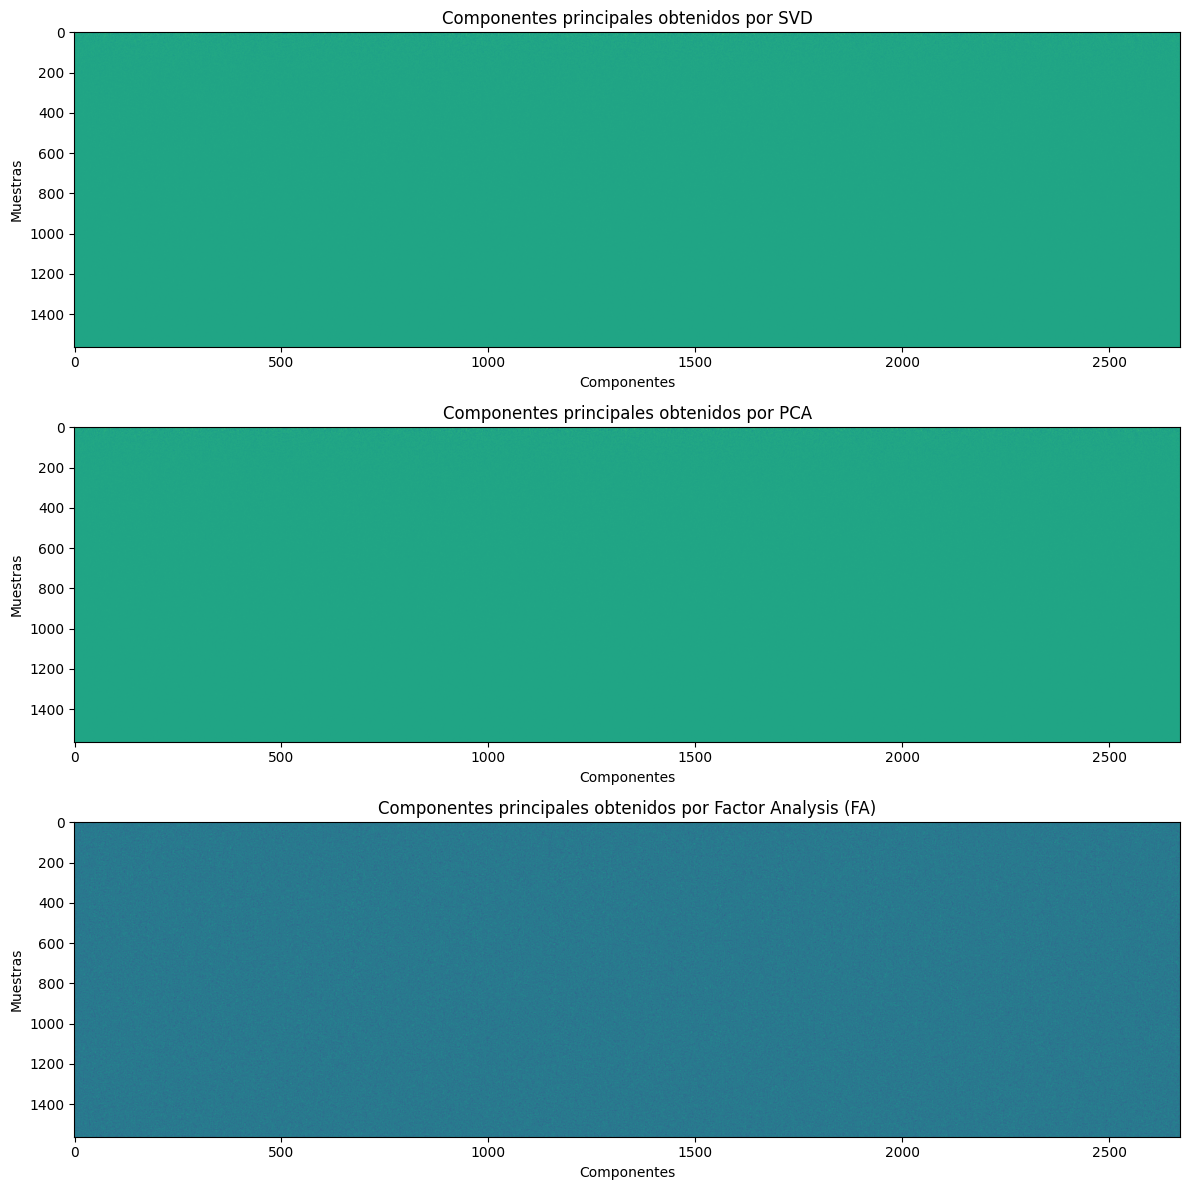

In [11]:

fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Plot para SVD
axes[0].imshow(svd_principal_components.T, cmap='viridis', aspect='auto')
axes[0].set_title('Componentes principales obtenidos por SVD')
axes[0].set_xlabel('Componentes')
axes[0].set_ylabel('Muestras')

# Plot para PCA
axes[1].imshow(pca_principal_components.T, cmap='viridis', aspect='auto')
axes[1].set_title('Componentes principales obtenidos por PCA')
axes[1].set_xlabel('Componentes')
axes[1].set_ylabel('Muestras')

# Plot para Factor Analysis (FA)
axes[2].imshow(fa_principal_components.T, cmap='viridis', aspect='auto')
axes[2].set_title('Componentes principales obtenidos por Factor Analysis (FA)')
axes[2].set_xlabel('Componentes')
axes[2].set_ylabel('Muestras')

plt.tight_layout()
plt.show()

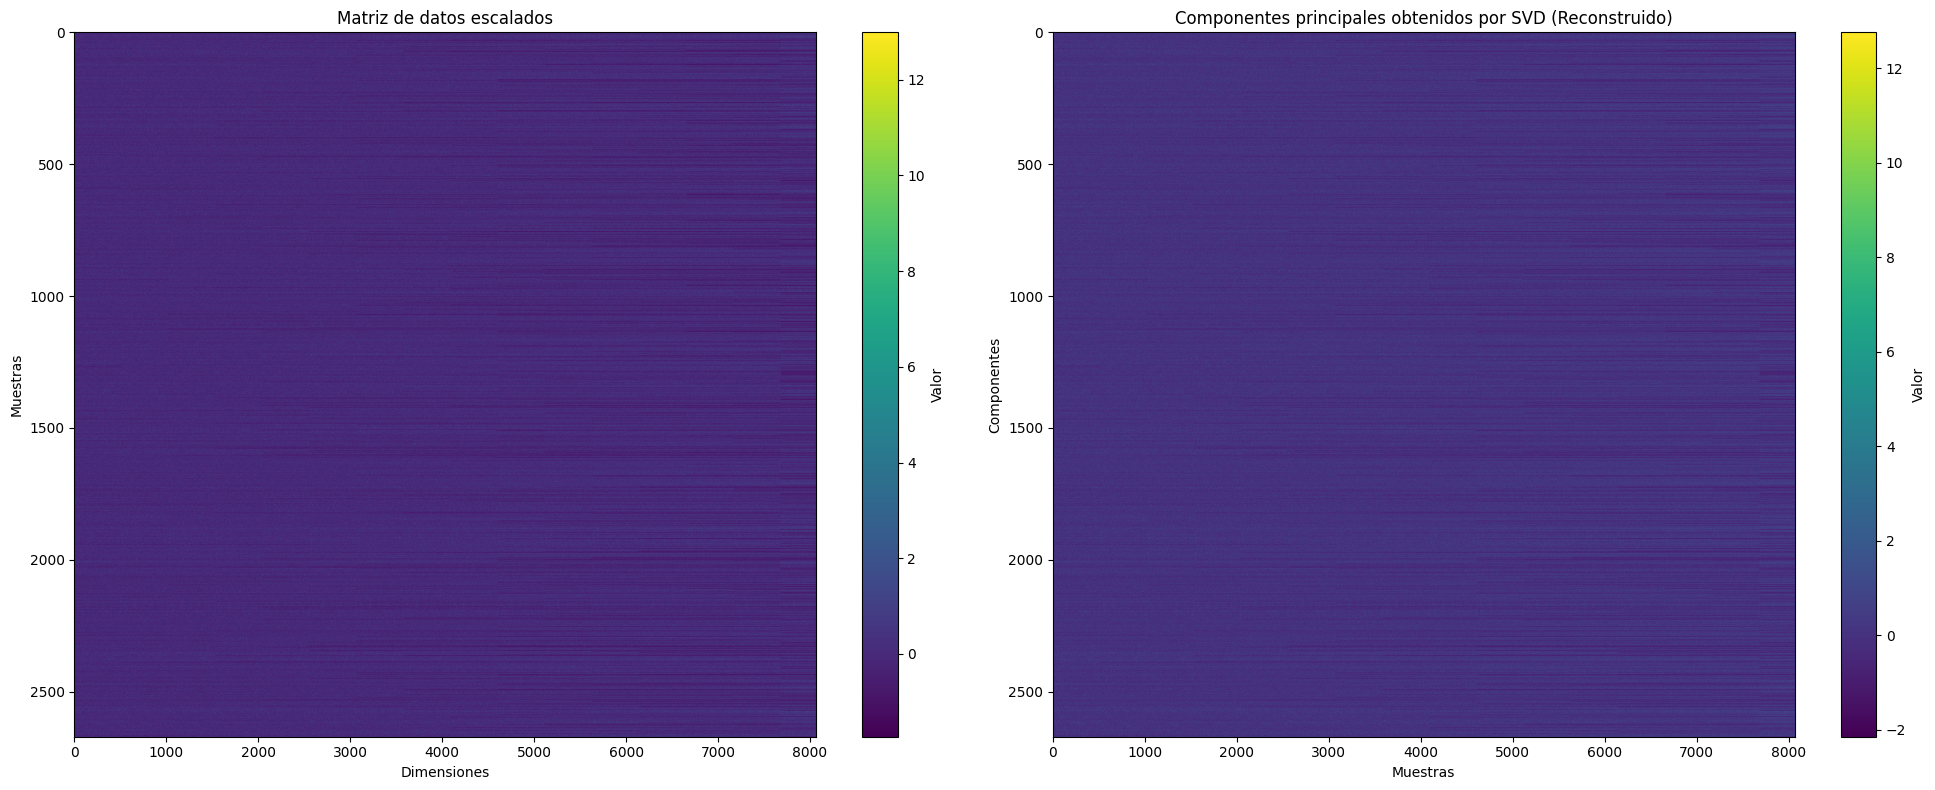

In [12]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

im1 = ax1.imshow(scaled_data, cmap='viridis', aspect='auto')
ax1.set_title('Matriz de datos escalados')
ax1.set_xlabel('Dimensiones')
ax1.set_ylabel('Muestras')
fig.colorbar(im1, ax=ax1, label='Valor')

im2 = ax2.imshow(svd_reconstructed_data, cmap='viridis', aspect='auto')
ax2.set_title('Componentes principales obtenidos por SVD (Reconstruido)')
ax2.set_xlabel('Muestras')
ax2.set_ylabel('Componentes')
fig.colorbar(im2, ax=ax2, label='Valor')

plt.tight_layout()

plt.show()

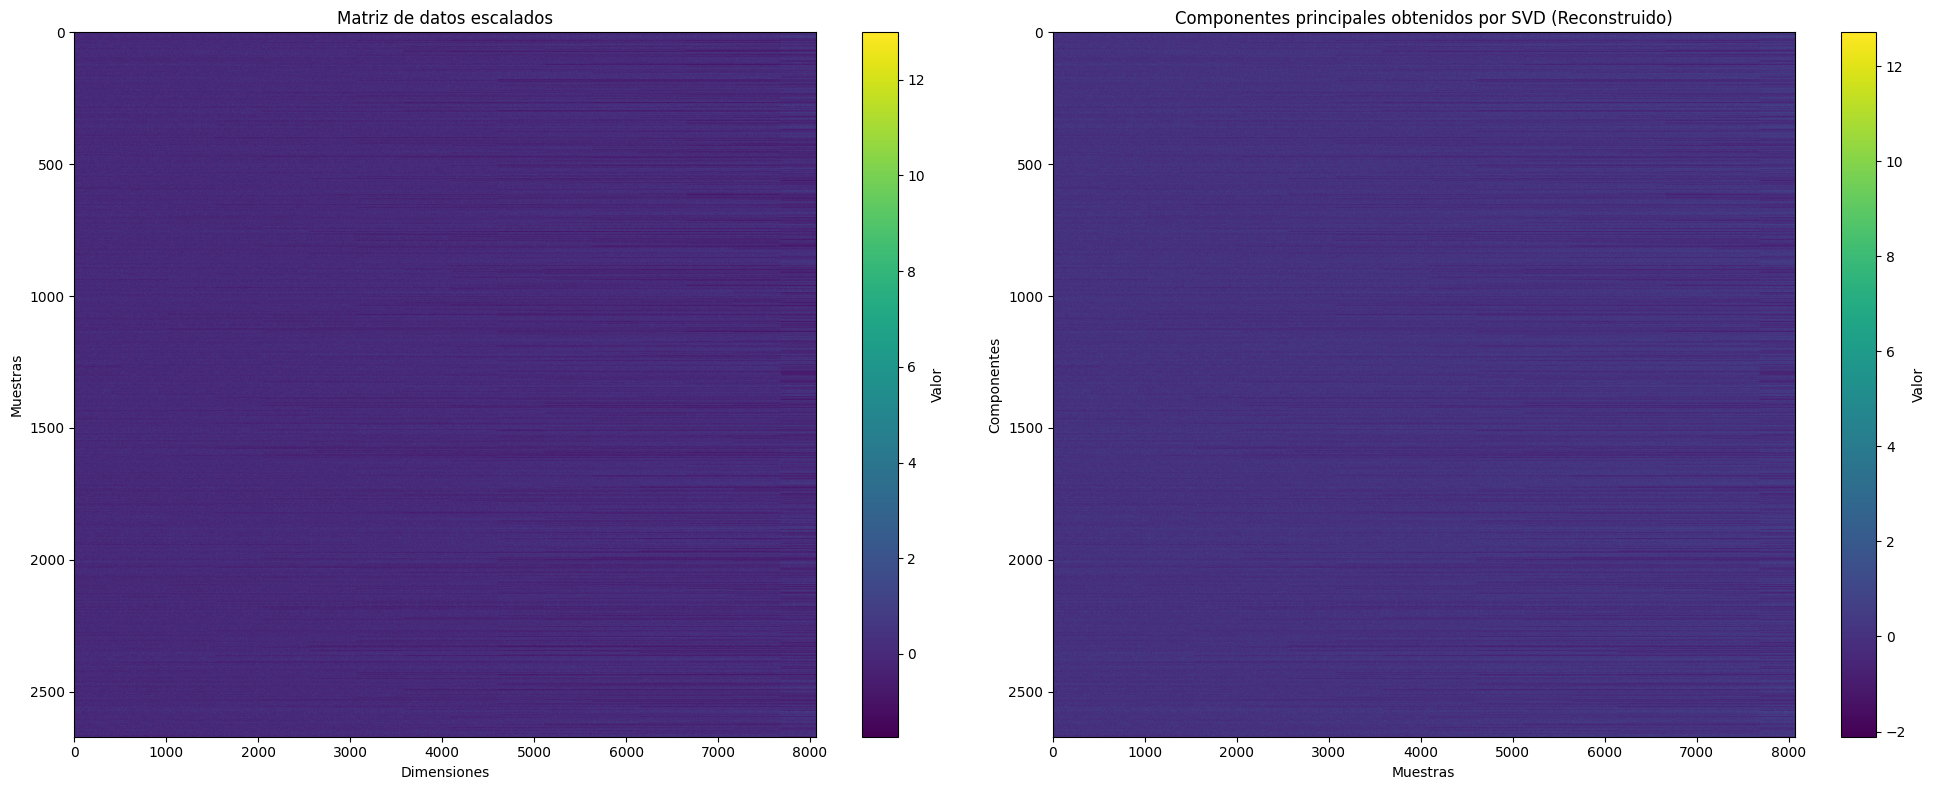

In [13]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

im1 = ax1.imshow(scaled_data, cmap='viridis', aspect='auto')
ax1.set_title('Matriz de datos escalados')
ax1.set_xlabel('Dimensiones')
ax1.set_ylabel('Muestras')
fig.colorbar(im1, ax=ax1, label='Valor')

im2 = ax2.imshow(pca_reconstructed_data, cmap='viridis', aspect='auto')
ax2.set_title('Componentes principales obtenidos por SVD (Reconstruido)')
ax2.set_xlabel('Muestras')
ax2.set_ylabel('Componentes')
fig.colorbar(im2, ax=ax2, label='Valor')

plt.tight_layout()

plt.show()

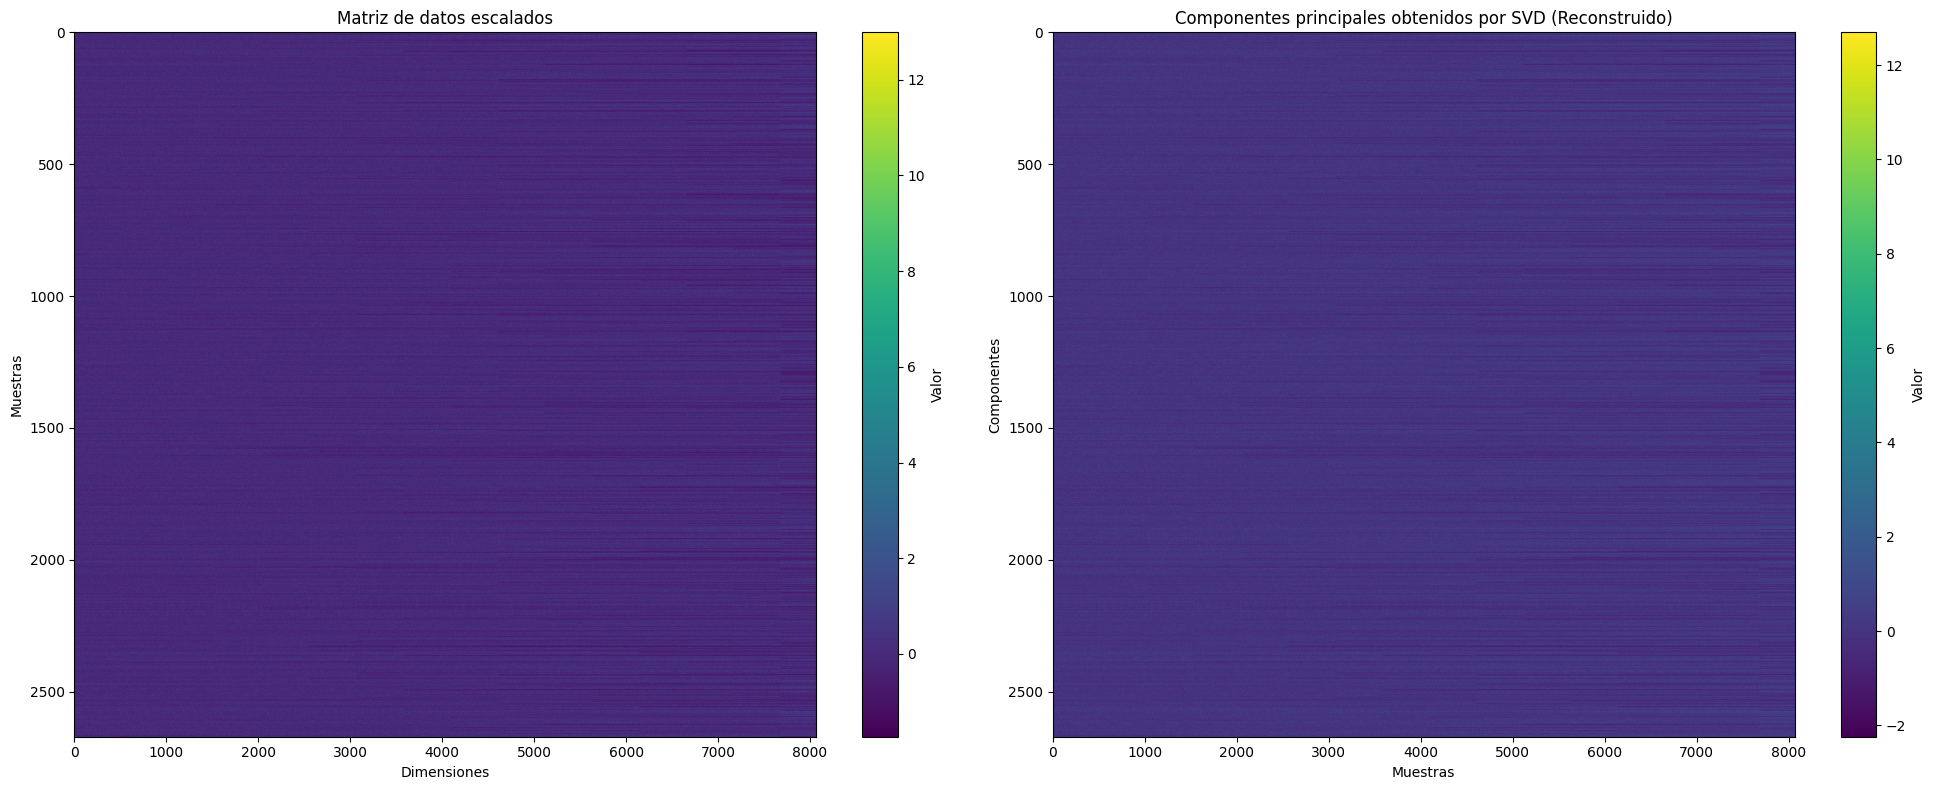

In [14]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

im1 = ax1.imshow(scaled_data, cmap='viridis', aspect='auto')
ax1.set_title('Matriz de datos escalados')
ax1.set_xlabel('Dimensiones')
ax1.set_ylabel('Muestras')
fig.colorbar(im1, ax=ax1, label='Valor')

im2 = ax2.imshow(fa_reconstructed_data, cmap='viridis', aspect='auto')
ax2.set_title('Componentes principales obtenidos por SVD (Reconstruido)')
ax2.set_xlabel('Muestras')
ax2.set_ylabel('Componentes')
fig.colorbar(im2, ax=ax2, label='Valor')

plt.tight_layout()

plt.show()

# 2. MÉTODOS DE CLUSTERING

## 2.1. KMEANS

In [18]:
class Dendograma:
    def __init__(self,data,k):
        self.data = data
        self.k = k

    def assign_clusters(self,centroids):
        clusters = {}
        for x in self.data:
            distances = np.linalg.norm(x - centroids, axis=1)
            cluster = np.argmin(distances)
            if cluster not in clusters:
                clusters[cluster] = []
            clusters[cluster].append(x)
        return clusters
    
    def initialize_centroids(self):
        if self.k > self.data.shape[0]:
            raise ValueError("El número de clusters no puede ser mayor que el número de puntos de datos.")
        indices = random.sample(range(data.shape[0]), self.k)
        centroids = self.data[indices]
        return centroids
    
    def update_centroids(self,clusters):
        centroids = np.zeros((self.k, clusters[0][0].shape[0]))
        for cluster in clusters:
            centroids[cluster] = np.mean(clusters[cluster], axis=0)
        return centroids
    
    def kmeans(self, max_iterations=100):
        centroids = self.initialize_centroids(self.data, self.k)
        for _ in range(max_iterations):
            clusters = self.assign_clusters(data, centroids)
            new_centroids = self.update_centroids(clusters, self.k)
            if np.all(centroids == new_centroids):
                break
            centroids = new_centroids
        return centroids, clusters
    

In [19]:

def assign_clusters(data, centroids):
    clusters = {}
    for x in data:
        distances = np.linalg.norm(x - centroids, axis=1)
        cluster = np.argmin(distances)
        if cluster not in clusters:
            clusters[cluster] = []
        clusters[cluster].append(x)
    return clusters

def initialize_centroids(data, k):
    if k > data.shape[0]:
        raise ValueError("El número de clusters no puede ser mayor que el número de puntos de datos.")
    indices = random.sample(range(data.shape[0]), k)
    centroids = data[indices]
    return centroids

def update_centroids(clusters, k):
    centroids = np.zeros((k, clusters[0][0].shape[0]))
    for cluster in clusters:
        centroids[cluster] = np.mean(clusters[cluster], axis=0)
    return centroids

def kmeans(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iterations):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(clusters, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters

## 2.2. DBSCAN

In [47]:
import numpy as np
from sklearn.neighbors import BallTree

def DBSCAN(ds, radio, vecinos_min):
    cluster = np.zeros(ds.shape[0])
    cluster[:] = -1
    c = 0
    tree = BallTree(ds)
    for i in range(ds.shape[0]):
        if cluster[i] != -1:
            continue
        vecinos = tree.query_radius(ds[i].reshape(1, -1), r=radio)[0]
        if len(vecinos) < vecinos_min:
            cluster[i] = 0
            continue
        c += 1
        cluster[i] = c
        j = 0
        while j < len(vecinos):
            if cluster[vecinos[j]] == 0:
                cluster[vecinos[j]] = c
            elif cluster[vecinos[j]] == -1:
                cluster[vecinos[j]] = c
                vecinos2 = tree.query_radius(ds[vecinos[j]].reshape(1, -1), r=radio)[0]
                if len(vecinos2) >= vecinos_min:
                    vecinos = np.concatenate((vecinos, np.setdiff1d(vecinos2, vecinos)))
            j += 1

    return cluster

In [66]:
import numpy as np
from sklearn.neighbors import BallTree

def dbscan(ds, radio, vecinos_min):
    cluster = np.zeros(ds.shape[0], dtype=float)
    cluster[:] = -1
    c = 0
    tree = BallTree(ds)
    for i in range(ds.shape[0]):
        if cluster[i]!= -1:
            continue
        vecinos = tree.query_radius(ds[i].reshape(1, -1), r=radio)[0]
        if len(vecinos) < vecinos_min:
            cluster[i] = 0
            continue
        c += 1
        cluster[i] = c
        stack = vecinos.tolist()
        while stack:
            punto = stack.pop()
            if cluster[punto] == -1:
                cluster[punto] = c
                vecinos2 = tree.query_radius(ds[punto].reshape(1, -1), r=radio)[0]
                if len(vecinos2) >= vecinos_min:
                    nuevos_vecinos = np.setdiff1d(vecinos2, vecinos)
                    #stack.extend(nuevos_vecinos.tolist())
            elif cluster[punto] == 0:
                cluster[punto] = c

    return cluster

def predict_dbscan(test_vector, train_ds, radio, vecinos_min):
    tree = BallTree(train_ds)
    vecinos = tree.query_radius(test_vector.reshape(1, -1), r=radio)[0]
    if len(vecinos) < vecinos_min:
        return 0
    cluster_labels = dbscan(train_ds, radio, vecinos_min)
    for punto in vecinos:
        if cluster_labels[punto]!= 0:
            return cluster_labels[punto]
    return 0


# Utils

In [115]:
import pandas as pd
import csv

archivo_csv = "csvs/val_subset_10.csv"

def create_unique_labels_csv(archivo_csv):
    df = pd.read_csv(archivo_csv)

    labels = df['label'].unique()
    labels = sorted(labels)
    # enumarate labels
    labels_dict = {k: v for v, k in enumerate(labels)}

    #generate csv of labels_dict
    nombre_archivo = "val_subset_10_unique.csv"
    with open(nombre_archivo, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        
        # Escribir la cabecera del CSV (opcional)
        writer.writerow(['Label', 'Index'])
        
        # Escribir cada fila del CSV
        for label, index in labels_dict.items():
            writer.writerow([label, index])
    print(f'Se ha generado el archivo CSV "{nombre_archivo}" con éxito.')

create_unique_labels_csv(archivo_csv)

Se ha generado el archivo CSV "val_subset_10_unique.csv" con éxito.


# 3. Main Program

In [ ]:
df = pd.read_csv()

## 3.1. Para KMEANS

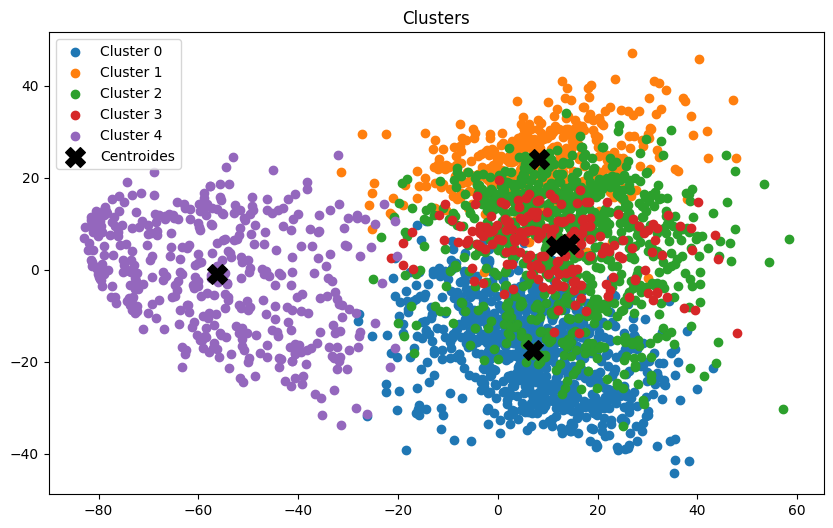

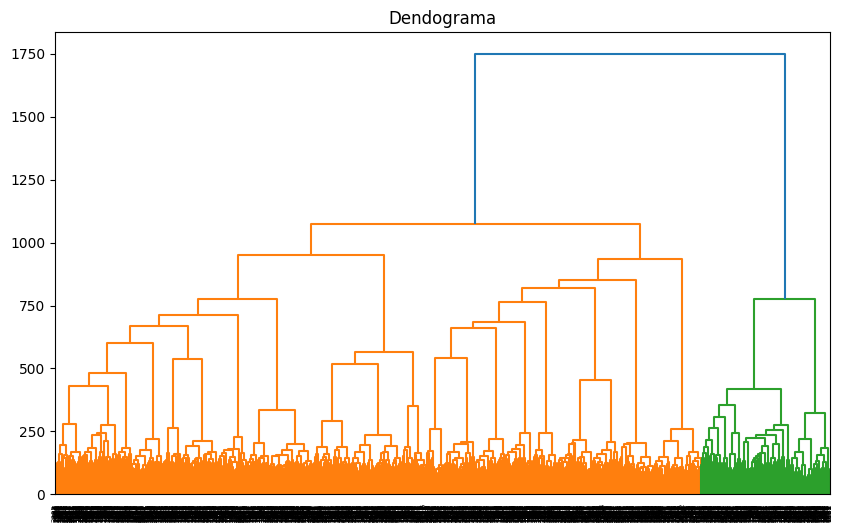

In [62]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

class Dendograma:
    def _init_(self, data, k):
        self.data = data
        self.k = k

    def assign_clusters(self, centroids):
        clusters = {}
        for x in self.data:
            distances = np.linalg.norm(x - centroids, axis=1)
            cluster = np.argmin(distances)
            if cluster not in clusters:
                clusters[cluster] = []
            clusters[cluster].append(x)
        return clusters

    def initialize_centroids(self):
        if self.k > self.data.shape[0]:
            raise ValueError("El número de clusters no puede ser mayor que el número de puntos de datos.")
        indices = random.sample(range(self.data.shape[0]), self.k)
        centroids = self.data[indices]
        return centroids

    def update_centroids(self, clusters):
        centroids = np.zeros((self.k, clusters[0][0].shape[0]))
        for cluster in clusters:
            centroids[cluster] = np.mean(clusters[cluster], axis=0)
        return centroids

    def kmeans(self, max_iterations=100):
        centroids = self.initialize_centroids()
        for _ in range(max_iterations):
            clusters = self.assign_clusters(centroids)
            new_centroids = self.update_centroids(clusters)
            if np.all(centroids == new_centroids):
                break
            centroids = new_centroids
        return centroids, clusters

def assign_clusters(data, centroids):
    clusters = {}
    for x in data:
        distances = np.linalg.norm(x - centroids, axis=1)
        cluster = np.argmin(distances)
        if cluster not in clusters:
            clusters[cluster] = []
        clusters[cluster].append(x)
    return clusters

def initialize_centroids(data, k):
    if k > data.shape[0]:
        raise ValueError("El número de clusters no puede ser mayor que el número de puntos de datos.")
    indices = random.sample(range(data.shape[0]), k)
    centroids = data[indices]
    return centroids

def update_centroids(clusters, k):
    centroids = np.zeros((k, clusters[0][0].shape[0]))
    for cluster in clusters:
        centroids[cluster] = np.mean(clusters[cluster], axis=0)
    return centroids

def kmeans(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iterations):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(clusters, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters

# Datos
data_for_clustering = np.vstack(pca_principal_components)

# Fijar k basado en otro análisis o conocimiento previo
k = 5  # Ajusta este valor según tu análisis

# Ejecutar K-Means
centroids, clusters = kmeans(data_for_clustering, k)

# Convertir clusters a un array
cluster_labels = np.zeros(data_for_clustering.shape[0])

for cluster, points in clusters.items():
    for point in points:
        index = np.where((data_for_clustering == point).all(axis=1))[0]
        cluster_labels[index] = cluster

plt.figure(figsize=(10, 6))

for cluster in range(k):
    cluster_points = data_for_clustering[cluster_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='black', s=200, label='Centroides')
plt.legend()
plt.title('Clusters')
plt.show()

# Dendograma
linked = linkage(data_for_clustering, 'ward')

plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendograma')
plt.show()

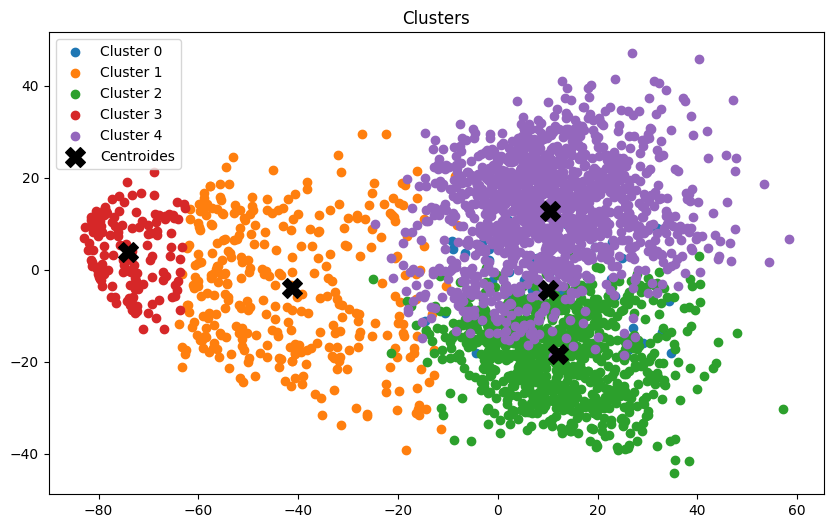

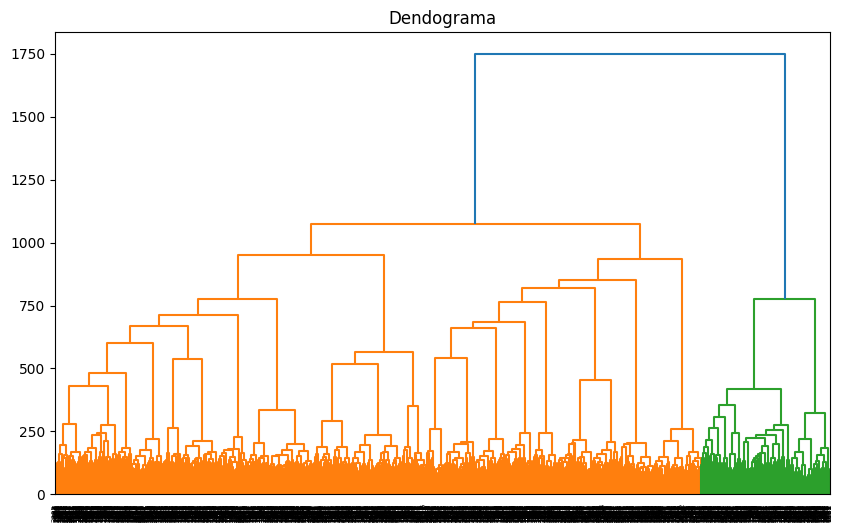

In [63]:
data_for_clustering = np.vstack(pca_principal_components)

# Fijar k basado en otro análisis o conocimiento previo
k = 5  # Ajusta este valor según tu análisis

# Ejecutar K-Means
centroids, clusters = kmeans(data_for_clustering, k)

# Convertir clusters a un array
cluster_labels = np.zeros(data_for_clustering.shape[0])

for cluster, points in clusters.items():
    for point in points:
        index = np.where((data_for_clustering == point).all(axis=1))[0]
        cluster_labels[index] = cluster

plt.figure(figsize=(10, 6))

for cluster in range(k):
    cluster_points = data_for_clustering[cluster_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='black', s=200, label='Centroides')
plt.legend()
plt.title('Clusters')
plt.show()

# Dendograma
linked = linkage(data_for_clustering, 'ward')

plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendograma')
plt.show()

## 3.2. Para DBSCAN

In [87]:
ds = pca_principal_components # 
radio = 100
vecinos_min = 15
cluster_labels_dbscan = DBSCAN(ds, radio, vecinos_min)
print(np.unique(cluster_labels_dbscan))

[0. 1.]


# 4. MÉTRICAS DE CLASIFCACIÓN

## 4.1. Para KMEANS

### 4.1.1. Silhouette Score

#######################
(2672, 1563) (2672,)
#######################
For n_clusters = 5 The average silhouette_score is : 0.045751229856828585


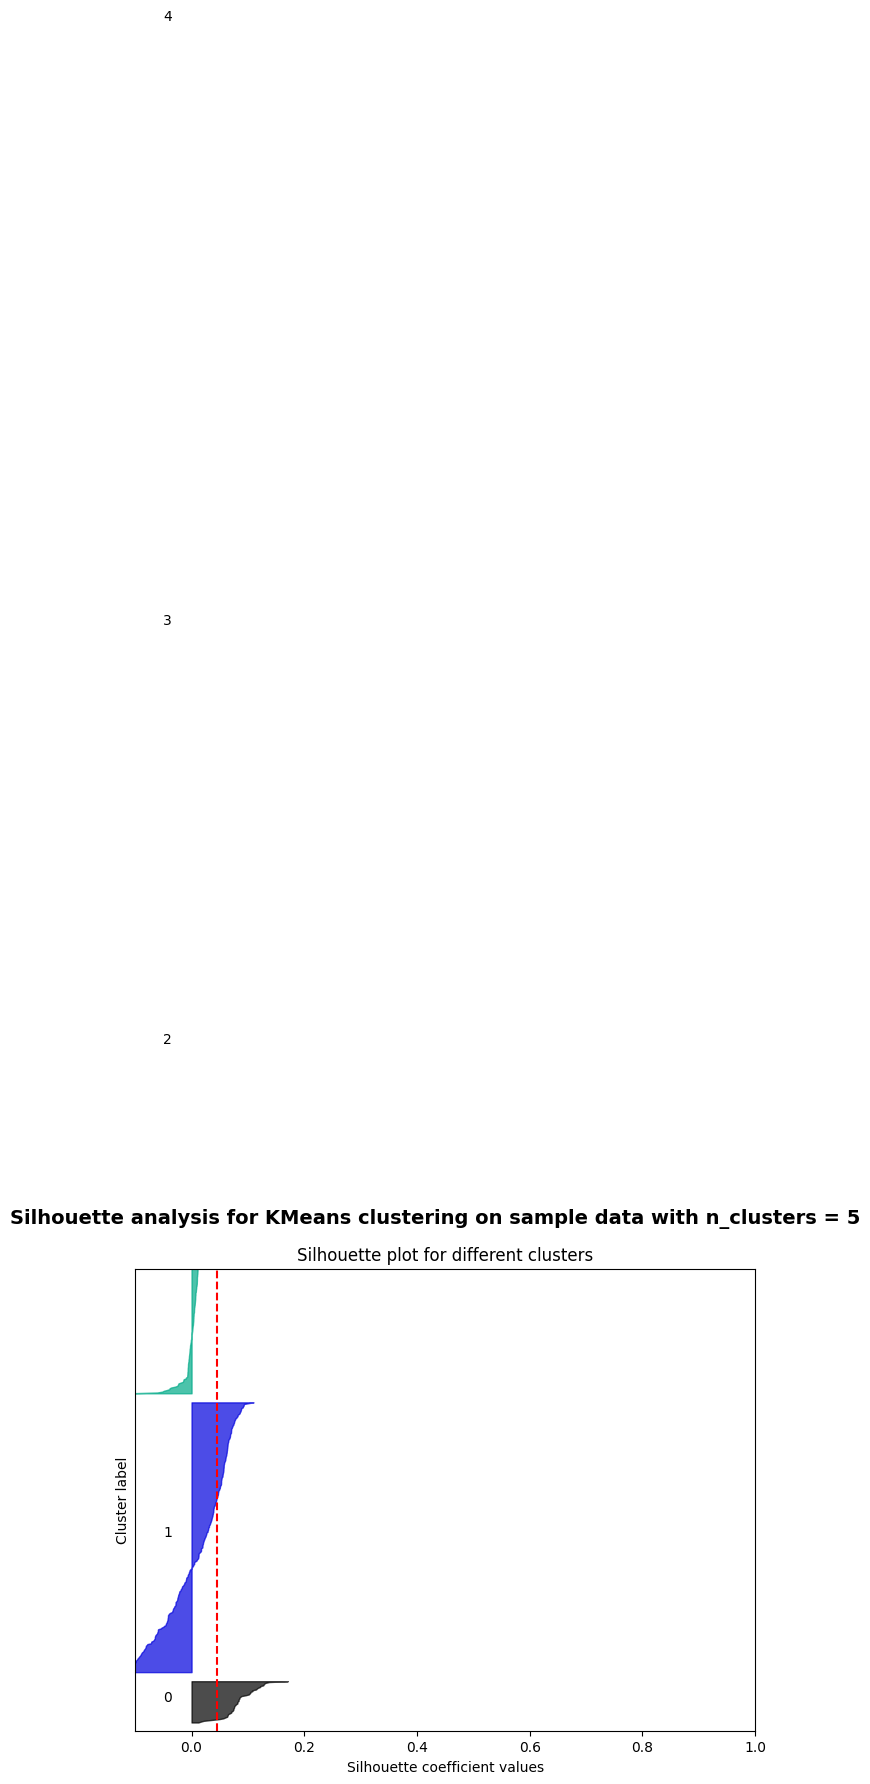

In [101]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generate sample data using make_blobs
X, y = make_blobs(
  n_samples=500,
  n_features=10, # Changeable
  centers=4,
  cluster_std=1,
  center_box=(-10.0, 10.0),
  shuffle=True,
  random_state=1,
) # For reproducibility

n_clusters = 5  # Number of clusters to evaluate

# Create a figure with only 1 subplot for the silhouette plot
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 6)

# Set up the silhouette plot
ax1.set_xlim([-0.1, 1])  # Range for silhouette score
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])  # Range to show clusters

############################################################################################
# Initialize the clusterer with the number of clusters and a random seed for reproducibility
#clusterer = KMeans(n_clusters=n_clusters, random_state=10)
#cluster_labels = clusterer.fit_predict(X)
############################################################################################

# Calculate the average silhouette score for all data
print("#######################")
print(pca_principal_components.shape, cluster_labels.shape)
print("#######################")

silhouette_avg = silhouette_score(pca_principal_components, cluster_labels)
print(
  "For n_clusters =",
  n_clusters,
  "The average silhouette_score is :",
  silhouette_avg,
)

# Calculate silhouette values for each sample
sample_silhouette_values = silhouette_samples(pca_principal_components, cluster_labels)

y_lower = 10
for i in range(n_clusters):
  # Aggregate silhouette values for samples belonging to cluster i and sort them
  ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
  ith_cluster_silhouette_values.sort()

  size_cluster_i = ith_cluster_silhouette_values.shape[0]
  y_upper = y_lower + size_cluster_i

  # Color the cluster in the silhouette plot
  color = cm.nipy_spectral(float(i) / n_clusters)
  ax1.fill_betweenx(
    np.arange(y_lower, y_upper),
    0,
    ith_cluster_silhouette_values,
    facecolor=color,
    edgecolor=color,
    alpha=0.7,
  )

  # Label cluster numbers in the silhouette plot
  ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

  # Update y_lower for the next plot
  y_lower = y_upper + 10  # 10 for samples without silhouette values

# Set up configurations and labels for the silhouette plot
ax1.set_title("Silhouette plot for different clusters")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# Vertical line for average silhouette score of all values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

# Remove y-axis labels/ticks to clean up the plot
ax1.set_yticks([])

# Main title of the figure
plt.suptitle(
  "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
  % n_clusters,
  fontsize=14,
  fontweight="bold",
)

# Display the full plot
plt.show()

### 4.1.2. Rand Index (RI)

In [102]:
from sklearn.metrics import adjusted_rand_score

# Calculate Rand Index
rand_index = adjusted_rand_score(y, cluster_labels)
print(f"Adjusted Rand Index: {rand_index}")

ValueError: Found input variables with inconsistent numbers of samples: [500, 2672]

### 4.1.3. Mutual Information (MI)

In [ ]:
from sklearn.metrics import adjusted_mutual_info_score

# Calculate Mutual Information
mutual_info = adjusted_mutual_info_score(y, cluster_labels)
print(f"Adjusted Mutual Information: {mutual_info}")

# 4.2. Para DBSCAN

### 4.2.1. Silhouette Score

ValueError: Found input variables with inconsistent numbers of samples: [500, 2672]

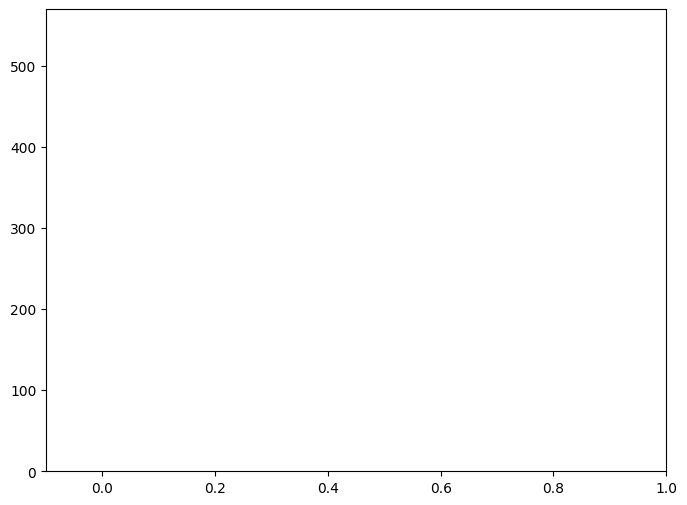

In [103]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generate sample data using make_blobs
#X, y = make_blobs(
#  n_samples=500,
#  n_features=10, # Changeable
#  centers=4,
#  cluster_std=1,
#  center_box=(-10.0, 10.0),
#  shuffle=True,
#  random_state=1,
#) # For reproducibility

n_clusters = 6  # Number of clusters to evaluate

# Create a figure with only 1 subplot for the silhouette plot
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 6)

# Set up the silhouette plot
ax1.set_xlim([-0.1, 1])  # Range for silhouette score
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])  # Range to show clusters

############################################################################################
# Initialize the clusterer with the number of clusters and a random seed for reproducibility
#clusterer = KMeans(n_clusters=n_clusters, random_state=10)
#cluster_labels = clusterer.fit_predict(X)
############################################################################################

# Calculate the average silhouette score for all data
silhouette_avg = silhouette_score(X, cluster_labels_dbscan)
print(
  "For n_clusters =",
  n_clusters,
  "The average silhouette_score is :",
  silhouette_avg,
)

# Calculate silhouette values for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels_dbscan)

y_lower = 10
for i in range(n_clusters):
  # Aggregate silhouette values for samples belonging to cluster i and sort them
  ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_dbscan == i]
  ith_cluster_silhouette_values.sort()

  size_cluster_i = ith_cluster_silhouette_values.shape[0]
  y_upper = y_lower + size_cluster_i

  # Color the cluster in the silhouette plot
  color = cm.nipy_spectral(float(i) / n_clusters)
  ax1.fill_betweenx(
    np.arange(y_lower, y_upper),
    0,
    ith_cluster_silhouette_values,
    facecolor=color,
    edgecolor=color,
    alpha=0.7,
  )

  # Label cluster numbers in the silhouette plot
  ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

  # Update y_lower for the next plot
  y_lower = y_upper + 10  # 10 for samples without silhouette values

# Set up configurations and labels for the silhouette plot
ax1.set_title("Silhouette plot for different clusters")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# Vertical line for average silhouette score of all values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

# Remove y-axis labels/ticks to clean up the plot
ax1.set_yticks([])

# Main title of the figure
plt.suptitle(
  "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
  % n_clusters,
  fontsize=14,
  fontweight="bold",
)

# Display the full plot
plt.show()

### 4.2.2. Rand Index (RI)

In [104]:
from sklearn.metrics import adjusted_rand_score

# Calculate Rand Index
rand_index = adjusted_rand_score(y, cluster_labels_dbscan)
print(f"Adjusted Rand Index: {rand_index}")

ValueError: Found input variables with inconsistent numbers of samples: [500, 2672]

### 4.2.3. Mutual Information (MI)

In [ ]:
from sklearn.metrics import adjusted_mutual_info_score

# Calculate Mutual Information
mutual_info = adjusted_mutual_info_score(y, cluster_labels_dbscan)
print(f"Adjusted Mutual Information: {mutual_info}")